In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SRTP_Deep_RNN_5_3_Utils as srtp

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dict = {}
filenum = 19

In [3]:
data_dict['data1'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_JJL_5_2_0.txt"
                               ,row_start = 0,row_end = 18000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data2'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_JJL_5_2_0.txt"
                               ,row_start = 22000,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data3'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WTX_5_2_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data4'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WSP_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data5'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_CFW_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data6'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_XXS_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data7'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WZH_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data8'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_LWJ_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

(18000, 8)
(6634, 8)
(29227, 8)
(28199, 8)
(31133, 8)
(26655, 8)
(28300, 8)
(27090, 8)


In [4]:
data_dict['data9'] = srtp.read_data("SRTP_Mea_2_2\\train_HYC_2_7_0.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)

data_dict['data10'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_1.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data11'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_2.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data12'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data13'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data14'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_5.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data15'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_6.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['test1'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_7.txt"
                               ,row_start = 0,row_end = 4000,column_start = 0, column_end = 7,print_shape = True)

data_dict['data16'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_8.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data17'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_9.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data18'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_10.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data19'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_11.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(14975, 8)
(35283, 7)
(25715, 7)
(28840, 7)
(23802, 7)
(23159, 7)
(25307, 7)
(4000, 7)
(31865, 7)
(24954, 7)
(26397, 7)
(31145, 7)


In [5]:

num_periods = 300
f_horizon = 5
mean1 = -80 
std1 = 15 
meanw1 = 0
stdw1 = 75

mean2 = -110
std2 = 15
meanw2 = 0
stdw2 = 90

meany = 35
stdy = 15

In [6]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['data'+str(i)].copy()
    temp1 = data_dict['data' + str(i)][f_horizon:,0]
    temp2 = data_dict['data' + str(i)][f_horizon:,2]
    data_dict['truey' + str(i)] = (temp1 - temp2).reshape(-1,1)
    data_dict['normalizeddata' + str(i)][:,0] = (data_dict['data' + str(i)][:,0] - mean1) / std1
    data_dict['normalizeddata' + str(i)][:,1] = (data_dict['data' + str(i)][:,1] - meanw1) / stdw1
    data_dict['normalizeddata' + str(i)][:,2] = (data_dict['data' + str(i)][:,2] - mean2) / std2
    data_dict['normalizeddata' + str(i)][:,3] = (data_dict['data' + str(i)][:,3] - meanw2) / stdw2
    data_dict['normalizeddata' + str(i)][:,4] = data_dict['data' + str(i)][:,4] / 3
    data_dict['normalizeddata' + str(i)][:,5] = data_dict['data' + str(i)][:,5] / 3
    data_dict['normalizeddata' + str(i)][:,6] = data_dict['data' + str(i)][:,6] / 3

In [7]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['normalizeddata' + str(i)][:-f_horizon,:]
    data_dict['truey' + str(i)] = (data_dict['truey' + str(i)] - meany)/stdy

In [8]:
validation_length = 4000;
seperate_test_set = [6,8,13,16];
test_index = 1;
train_index = 1;
breakpointset = [None for i in range(filenum)]
#breakpointset = [9775,1175,21640,20085,6428,None,15672,None,7388,15838,7947,16380,None,17840,15358,None,17390,8458,16442]
breakpointset = [7474,1348,11941,19839,11980,None,12721,None,7444,3029,6200,5600,None,6904,3900,None,6264,10586,10476]
for i in range(1,filenum + 1):
    if i in seperate_test_set:
        breakpoint = None;
    elif breakpointset[i-1] is None:
        breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-validation_length);
        print(breakpoint)
    else:
        breakpoint = breakpointset[i-1]
        print(breakpoint)
    if breakpoint is None:
        data_dict['final_testx' + str(test_index)] = data_dict['normalizeddata' + str(i)].copy()
        data_dict['final_testy' + str(test_index)] = data_dict['truey' + str(i)].copy()
        test_index += 1
    else:
        data_dict['testx' + str(train_index)] = data_dict['normalizeddata' + str(i)][breakpoint:breakpoint+validation_length,:].copy()
        data_dict['testy' + str(train_index)] = data_dict['truey' + str(i)][breakpoint:breakpoint+validation_length,:].copy()
        data_dict['datax' + str(2*train_index - 1)] = data_dict['normalizeddata' + str(i)][:breakpoint,:].copy()
        data_dict['datay' + str(2*train_index - 1)] = data_dict['truey' + str(i)][:breakpoint,:].copy()
        data_dict['datax' + str(2*train_index)] = data_dict['normalizeddata'+str(i)][breakpoint + validation_length:,:].copy()
        data_dict['datay' + str(2*train_index)] = data_dict['truey' + str(i)][breakpoint+validation_length:,:].copy()
        train_index += 1
train_filenum  = train_index - 1
test_filenum = test_index - 1

7474
1348
11941
19839
11980
12721
7444
3029
6200
5600
6904
3900
6264
10586
10476


In [9]:
    filenum = train_filenum
    ckptname = 'fully-connected_5_3_ANN_normal'
    saver_name = ckptname
    learning_rate = 0.000001
    beta = 0.00001
    epochs = 1
    ration = 1
    cluster_num = 64
    recent = 8
    
    inputs = recent*7
    outputshape = 1
    num_periods = 256
    
    """
    8265 parameters
    
    """

    hidden1 = 48
    hidden2 = 40
    hidden3 = 32
    hidden4 = 32
    hidden5 = 24

    tf.reset_default_graph()
    
    x = tf.placeholder(tf.float32,[None,inputs])
    y = tf.placeholder(tf.float32,[None,outputshape]);
    
    hidden_layer1 = tf.layers.dense(x,hidden1,name = 'hidden1')
    hidden_layer2 = tf.layers.dense(tf.nn.relu(hidden_layer1),hidden2,name = 'hidden2')
    hidden_layer3 = tf.layers.dense(tf.nn.relu(hidden_layer2),hidden3,name = 'hidden3')
    hidden_layer4 = tf.layers.dense(tf.nn.relu(hidden_layer3),hidden4,name = 'hidden4')
    hidden_layer5 = tf.layers.dense(tf.nn.relu(hidden_layer4),hidden5,name = 'hidden5')
    outputs = tf.layers.dense(tf.nn.relu(hidden_layer5),outputshape,name = 'outputs')

    MSE = tf.reduce_mean(tf.square(outputs[:,:] - y[:,:]))

    Regulizer = beta*(tf.nn.l2_loss(tf.trainable_variables('hidden1')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden2')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden3')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden4')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('hidden5')[0])+
                      tf.nn.l2_loss(tf.trainable_variables('outputs')[0])
                      )
    loss = tf.add(Regulizer,ration*MSE)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    gvs = optimizer.compute_gradients(loss)
    capped_gvs = [(tf.clip_by_value(grad,-0.5,0.5),var) for grad,var in gvs]
    training_op = optimizer.apply_gradients(capped_gvs)
    init = tf.global_variables_initializer()
    mse = 0
    List1 = []
    x_data = np.zeros([cluster_num,inputs])
    y_data = np.zeros([cluster_num,outputshape])
    #y_data = np.zeros((cluster_num,num_periods,outputshape))

    for i in range(1,2*filenum + 1):
        List1.append(data_dict['datax' + str(i)].shape[0] - recent)
    with tf.Session() as sess:
        #init.run()
        saver = tf.train.Saver()
        checkpoint_filepath = 'ckptset\\' + ckptname
        saver.restore(sess,checkpoint_filepath)
        term = 0
        for ep in range(epochs):
            source = np.random.randint(1,2*filenum + 1,cluster_num,dtype = int)
            
            for i in range(cluster_num):
                index = np.random.randint(recent,List1[source[i]-1])
                for j in range(recent):
                    x_data[i,j*7:j*7+7] = data_dict['datax' + str(source[i])][index - j,0:7]
                #data_angle[i,:,:] = data_dict['datax' + str(source[i])][index:index+num_periods,0:4]
                #data_emg[i,:,:] = data_dict['datax' + str(source[i])][index:index+num_periods,4:7]
                y_data[i,:] = data_dict['datay' + str(source[i])][index,:]
            sess.run(training_op,feed_dict = { x:x_data,y:y_data})
            if ep%5 == 0:
                mse +=MSE.eval(feed_dict = {x:x_data,y:y_data})
                term += 1
            if ep%1000 == 0:
                mse /= term
                print(ep,"\tMSE:",mse)
                term = 0
                mse = 0
        hidden1_params = sess.run(tf.trainable_variables('hidden1'))
        hidden2_params = sess.run(tf.trainable_variables('hidden2'))
        hidden3_params = sess.run(tf.trainable_variables('hidden3'))
        hidden4_params = sess.run(tf.trainable_variables('hidden4'))
        hidden5_params = sess.run(tf.trainable_variables('hidden5'))
        output_params = sess.run(tf.trainable_variables('outputs'))
        saver = tf.train.Saver()
        save_path = saver.save(sess, 'ckptset\\'+ saver_name);
        #params_list = [rnn_params,emg_params,dense1_params,hidden_dense_params,dense2_params]

INFO:tensorflow:Restoring parameters from ckptset\fully-connected_5_3_ANN_normal
0 	MSE: 0.062165964394807816


In [10]:
recent = 8

In [11]:
def verify(string,num,is_printout):    
    alpha = 0.00001
    start = 0
    end = 50000
    hiddenW1 = hidden1_params[0]
    hiddenb1 = hidden1_params[1]
    hiddenW2 = hidden2_params[0]
    hiddenb2 = hidden2_params[1]
    hiddenW3 = hidden3_params[0]
    hiddenb3 = hidden3_params[1]
    hiddenW4 = hidden4_params[0]
    hiddenb4 = hidden4_params[1]
    hiddenW5 = hidden5_params[0]
    hiddenb5 = hidden5_params[1]
    outputW1 = output_params[0].copy()
    outputb1 = output_params[1].copy()
    
    #mcu_x = mcu_test4[100:-5,0:7]
    
    #mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
    #testy = ((mcu_y - 35)/15).reshape([-1,1])
    #X = mcu_x.copy()
    #X[:,0] = (X[:,0] - mean1)/std1
    #X[:,1] = (X[:,1] - meanw1)/stdw1
    #X[:,2] = (X[:,2] - mean2)/std2
    #X[:,3] = (X[:,3] - meanw2)/stdw2
    #X[:,4] = (X[:,4] - 0)/3
    #X[:,5] = (X[:,5] - 0)/3
    #X[:,6] = (X[:,6] - 0)/3
    testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    X = data_dict[string+'x' + str(num)].copy()
    testx = np.zeros([X.shape[0] - recent,recent * 7])
    for i in range(recent):
        if(i == 0):
            testx[:,7*i:7*i+7] = X[recent:,0:7];
        else:
            testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];
    
    finaloutput = np.zeros(testy.shape)
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,24))
    ptr = 0;
    ####                                 #####
    #finaloutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros(finaloutput.shape)
    for i in range(testx.shape[0]):
        hidden1 = testx[i,:].dot(hiddenW1) + hiddenb1
        hidden1[hidden1<0] = 0
        
        hidden2 = hidden1.dot(hiddenW2) + hiddenb2
        hidden2[hidden2<0] = 0
        
        hidden3 = hidden2.dot(hiddenW3) + hiddenb3
        hidden3[hidden3<0] = 0
        
        hidden4 = hidden3.dot(hiddenW4) + hiddenb4
        hidden4[hidden4<0] = 0
        
        hidden5 = hidden4.dot(hiddenW5) + hiddenb5
        hidden5[hidden5<0] = 0
        output = (hidden5.dot(outputW1) + outputb1).reshape([-1,1])
        finaloutput[i,:] = output
        if(i==0):
            pass
        elif(i<5):
            pass
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = finaloutput[i-5,:]
            diff = x_k5 - y_k
            outputW1 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([24,1])
            outputb1 += alpha * diff
           
        Queue_hidden2[ptr,:] = output[0]
        ptr = (ptr+1)%5
        
    RNNmse = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:])*stdy**2)
    RNNmse2 = np.mean(np.square(finaloutput[start:end,:] - testy[start:end,:]))
    RNNqua = np.mean(np.square(np.square(finaloutput[start:end,:] - testy[start:end,:])))
    
    
    if(is_printout):

        

        print("RNN mse:",RNNmse)


        plt.figure(1,figsize = (18,1*5.4))
        plt.title("Angle diff Forecast vs Actual",fontsize = 14)

        plt.plot(pd.Series(np.ravel(testy[start:end,0]*stdy+meany)),"b-",markersize = 1,label = 'Actual')
        plt.plot(pd.Series(np.ravel(finaloutput[start:end,0]*stdy+meany)),"r-",markersize = 1,label = 'Forecast')
        #plt.plot(pd.Series(naivey[start:end,0]),'g-',markersize = 1,label = 'naive guess')
        plt.legend(loc = "upper left")
        plt.xlabel("Time Periods")

        plt.show()
    return [RNNmse,RNNqua]

In [44]:
mse = 0
use_filenum = 31
for i in range(6,use_filenum):
    RNNmse = verify('data',i,False)
    mse += RNNmse[0]
    
mse /= 25

In [45]:
mse

10.980837907880577

In [46]:
mse = 0
for i in range(3,15):
    RNNmse = verify('test',i,False)
    mse += RNNmse[0]
    
mse /= 13

In [47]:
mse

11.896656000663352

In [105]:
verify('final_test',1,False)

[23.200552544998867, 0.06640851748552141]

In [42]:
mse = 0
for i in range(1,4):
    RNNmse = verify('final_test',i,False)
    mse += RNNmse[0]
    
mse /= 4

In [43]:
mse

11.465363460861207

## SVR

In [18]:
from sklearn.externals import joblib

In [19]:
filename = 'SVR_model.sav'

In [254]:
joblib.dump(clf1, filename)

['SVR_model.sav']

In [20]:
clf1 = joblib.load(filename)

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
#clf1 = SVR(C=3, epsilon=0.1,verbose = 1,max_iter = 10000)

In [21]:
number = 0
recent = 8
breaking = 1
for i in range(1,31,breaking):
    number += (data_dict['datay' + str(i)].shape[0]- recent)
print(number)

datax = np.zeros([number,7 *recent])
datay = np.zeros([number,1])

ptr = 0
for i in range(1,31,breaking):
    number1 = data_dict['datay' + str(i)].shape[0] - recent
    for j in range(recent):
        datax[ptr:ptr+number1,7*j:7*j+7] = data_dict['datax' + str(i)][j:j+number1,0:7].copy()
    datay[ptr:ptr+number1,:] = data_dict['datay' + str(i)][recent:,:].copy()
    ptr += number1
#clf1.fit(datax,datay)

316953


In [24]:
mean_squared_error(datay, clf1.predict(datax) ) * 225

17.794046701603428

In [25]:
number = 0
recent = 8
for i in range(1,15,1):
    number += (data_dict['testy' + str(i)].shape[0]- recent)
print(number)

testx = np.zeros([number,7 *recent])
testy = np.zeros([number,1])

ptr = 0
for i in range(1,15,1):
    number1 = data_dict['testy' + str(i)].shape[0] - recent
    for j in range(recent):
        testx[ptr:ptr+number1,7*j:7*j+7] = data_dict['testx' + str(i)][j:j+number1,0:7].copy()
    testy[ptr:ptr+number1,:] = data_dict['testy' + str(i)][recent:,:].copy()
    ptr += number1

mean_squared_error(testy, clf1.predict(testx) ) * 225

55888


20.895933779153733

In [26]:
number = 0
recent = 8
for i in range(1,4,1):
    number += (data_dict['final_testy' + str(i)].shape[0]- recent)
print(number)

final_testx = np.zeros([number,7 *recent])
final_testy = np.zeros([number,1])

ptr = 0
for i in range(1,4,1):
    number1 = data_dict['final_testy' + str(i)].shape[0] - recent
    for j in range(recent):
        final_testx[ptr:ptr+number1,7*j:7*j+7] = data_dict['final_testx' + str(i)][j:j+number1,0:7].copy()
    final_testy[ptr:ptr+number1,:] = data_dict['final_testy' + str(i)][recent:,:].copy()
    ptr += number1

mean_squared_error(final_testy, clf1.predict(final_testx) ) * 225

77508


23.834819678715085

In [27]:
params_list = srtp.train_model(data_dict,is_new = False,ckptname = 'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_2',
                          learning_rate = 0.000000003,beta = 0,epochs = 1,
                          ration = 0,cluster_num = 128,filenum = train_filenum,saver_name = None,num_periods = 100)

Instructions for updating:
Use the retry module or similar alternatives.
INFO:tensorflow:Restoring parameters from ckptset\new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_2
0 	MSE: 0.03416046127676964


In [28]:
    alpha = 0.00001
    start = 0
    end = 50000
    hiddenW1 = hidden1_params[0]
    hiddenb1 = hidden1_params[1]
    hiddenW2 = hidden2_params[0]
    hiddenb2 = hidden2_params[1]
    hiddenW3 = hidden3_params[0]
    hiddenb3 = hidden3_params[1]
    hiddenW4 = hidden4_params[0]
    hiddenb4 = hidden4_params[1]
    hiddenW5 = hidden5_params[0]
    hiddenb5 = hidden5_params[1]
    outputW1 = output_params[0].copy()
    outputb1 = output_params[1].copy()
    
    #mcu_x = mcu_test4[100:-5,0:7]
    
    #mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
    #testy = ((mcu_y - 35)/15).reshape([-1,1])
    #X = mcu_x.copy()
    #X[:,0] = (X[:,0] - mean1)/std1
    #X[:,1] = (X[:,1] - meanw1)/stdw1
    #X[:,2] = (X[:,2] - mean2)/std2
    #X[:,3] = (X[:,3] - meanw2)/stdw2
    #X[:,4] = (X[:,4] - 0)/3
    #X[:,5] = (X[:,5] - 0)/3
    #X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
    
    testy = data_dict['final_testy2'][recent:,:].reshape([-1,1])
    X = data_dict['final_testx2'].copy()
    testx = np.zeros([X.shape[0] - recent,recent * 7])
    for i in range(recent):
        if(i == 0):
            testx[:,7*i:7*i+7] = X[recent:,0:7];
        else:
            testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];
    
    ANNoutput = np.zeros(testy.shape)
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,24))
    ptr = 0;
    ####                                 #####
    #finaloutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros(ANNoutput.shape)
    for i in range(testy.shape[0]):
        hidden1 = testx[i,:].dot(hiddenW1) + hiddenb1
        hidden1[hidden1<0] = 0
        
        hidden2 = hidden1.dot(hiddenW2) + hiddenb2
        hidden2[hidden2<0] = 0
        
        hidden3 = hidden2.dot(hiddenW3) + hiddenb3
        hidden3[hidden3<0] = 0
        
        hidden4 = hidden3.dot(hiddenW4) + hiddenb4
        hidden4[hidden4<0] = 0
        
        hidden5 = hidden4.dot(hiddenW5) + hiddenb5
        hidden5[hidden5<0] = 0
        output = (hidden5.dot(outputW1) + outputb1).reshape([-1,1])
        ANNoutput[i,:] = output
        if(i==0):
            pass
        elif(i<5):
            pass
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = ANNoutput[i-5,:]
            diff = x_k5 - y_k
            outputW1 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([24,1])
            outputb1 += alpha * diff
           
        Queue_hidden2[ptr,:] = output[0]
        ptr = (ptr+1)%5
        
    ANNmse = np.mean(np.square(ANNoutput[start:end,:] - testy[start:end,:])*stdy**2)
    ANNmse2 = np.mean(np.square(ANNoutput[start:end,:] - testy[start:end,:]))
    ANNqua = np.mean(np.square(np.square(ANNoutput[start:end,:] - testy[start:end,:])))

In [29]:
ANNmse

14.85764384940204

In [30]:
    """
    SVR
    """
    
    SVR_y = clf1.predict(testx[:,:]) * stdy + meany
    SVRmse = np.mean(np.square(SVR_y[start+5:end] - testy[start+5:end]*stdy - meany))
    

In [31]:
SVRmse = np.mean(np.square(SVR_y[start:end] - testy[start:end]*stdy - meany))

In [32]:
SVRmse

713.2878820978588

In [33]:
    """
    RNN
    """
    beta = 1
    Q_angle = 0.004
    Q_omega = 0.04
    R = 1
    alpha = 0.0001
    testx = X.copy()
    testy = data_dict['final_testy2']
    
    
    rnn_params = params_list[0]
    emg_params = params_list[1]
    dense1_params = params_list[2]
    hidden_dense_params = params_list[3]
    dense2_params = params_list[4]
    rnnW1 = rnn_params[0]
    rnnb1 = rnn_params[1].reshape(1,-1)
    rnnW2 = rnn_params[2]
    rnnb2 = rnn_params[3].reshape(1,-1)
    rnnW3 = rnn_params[4]
    rnnb3 = rnn_params[5].reshape(1,-1)
    
    emgW1 = emg_params[0]
    emgb1 = emg_params[1].reshape(1,-1)
    emgW2 = emg_params[2]
    emgb2 = emg_params[3].reshape(1,-1)
    
    denseW1 = dense1_params[0]
    denseb1 = dense1_params[1].reshape(1,-1)
    denseW2 = hidden_dense_params[0]
    denseb2 = hidden_dense_params[1].reshape(1,-1)
    denseW3 = dense2_params[0].copy()
    denseb3 = dense2_params[1].reshape(1,-1).copy()
    
    mean1 = -80 
    std1 = 15 
    meanw1 = 0
    stdw1 = 75

    mean2 = -110
    std2 = 15
    meanw2 = 0
    stdw2 = 90

    meany = 35
    stdy = 15

    input_angle_size = rnn_params[0].shape[0] - rnn_params[0].shape[1]
    input_emg_size = emg_params[0].shape[0] - emg_params[0].shape[1]

    hiddensize = rnnW1.shape[1]
    rnnsize2 = rnnW2.shape[1]
    rnnsize3 = rnnW3.shape[1]
    
    rnn_emg_size = emgW1.shape[1]
    
    hiddenlayersize = len(denseb1)
    rnn_state_size = len(rnnb1)
    outputsize = len(denseb3)
    Test_angle_input = np.zeros((1,input_angle_size+hiddensize))
    Test_emg_input = np.zeros((1,input_emg_size+rnn_emg_size))
    State1 = np.zeros((1,hiddensize))
    State2 = np.zeros((1,rnnsize2))
    State3 = np.zeros((1,rnnsize3))
    emgState1 = np.zeros((1,rnn_emg_size))
    emgState2 = np.zeros((1,rnn_emg_size))
    temp_input = np.zeros((1,hiddensize + rnnsize2));
    temp_input2 = np.zeros((1,2*rnn_emg_size));
    concate_input = np.zeros((1,rnnsize3 + rnn_emg_size))
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,16))
    ptr = 0;
    
    ####                                 #####
    RNNoutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros((testx.shape[0],outputsize))
    for i in range(testx.shape[0]):
        Test_angle_input[0,:input_angle_size] = testx[i,0:4].T
        Test_angle_input[0,input_angle_size:] = State1
        State1 = Test_angle_input.dot(rnnW1) + rnnb1
        State1[State1<0] = 0

        temp_input[0,0:hiddensize] = State1
        temp_input[0,hiddensize:] = State2
        State2 = temp_input.dot(rnnW2) + rnnb2
        State2[State2<0] = 0

        temp_input[0,0:rnnsize2] = State2
        temp_input[0,rnnsize2:] = State3
        State3 = temp_input.dot(rnnW3) + rnnb3
        State3[State3<0] = 0
        
        Test_emg_input[0,0:input_emg_size] = testx[i,4:7].T
        Test_emg_input[0,input_emg_size:] = emgState1
        emgState1 = Test_emg_input.dot(emgW1) + emgb1
        emgState1[emgState1<0] = 0
        
        temp_input2[0,0:rnn_emg_size] = emgState1
        temp_input2[0,rnn_emg_size:] = emgState2
        emgState2 = temp_input2.dot(emgW2) + emgb2
        emgState2[emgState2<0] = 0
        
        concate_input[0,0:hiddensize] = State3
        concate_input[0,hiddensize:] = emgState2
        
        hidden = concate_input.dot(denseW1)+denseb1 
        hidden[hidden<0] = 0

        hidden2 = hidden.dot(denseW2) + denseb2
        hidden2[hidden2<0] = 0

        tempoutput = hidden2.dot(denseW3) + denseb3
        
        if(i==0):
            temp_uno = tempoutput*15 + 35
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
        elif(i<5):
            
            temp_uno = (tempoutput*15 + 35)*beta + (1-beta)*temp_uno
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R,Kalman_params)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = RNNoutput[i-5,:]
            diff = x_k5 - y_k
            denseW3 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([16,1])
            denseb3 += alpha * diff
            
            temp_uno = (tempoutput*15 + 35)*beta + (1-beta)*temp_uno
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R,Kalman_params)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
            
        Queue_hidden2[ptr,:] = hidden2[0]
        ptr = (ptr+1)%5
        
    RNNmse = np.mean(np.square(RNNoutput[start:end,:] - testy[start:end,:])*stdy**2)
    RNNmse2 = np.mean(np.square(RNNoutput[start:end,:] - testy[start:end,:]))
    RNNqua = np.mean(np.square(np.square(RNNoutput[start:end,:] - testy[start:end,:])))
    
    

In [34]:
RNNmse

11.422452914255404

ANN mse: 14.565150357286225
SVR mse: 202.15870800198226
RNN mse: 8.421440465637831


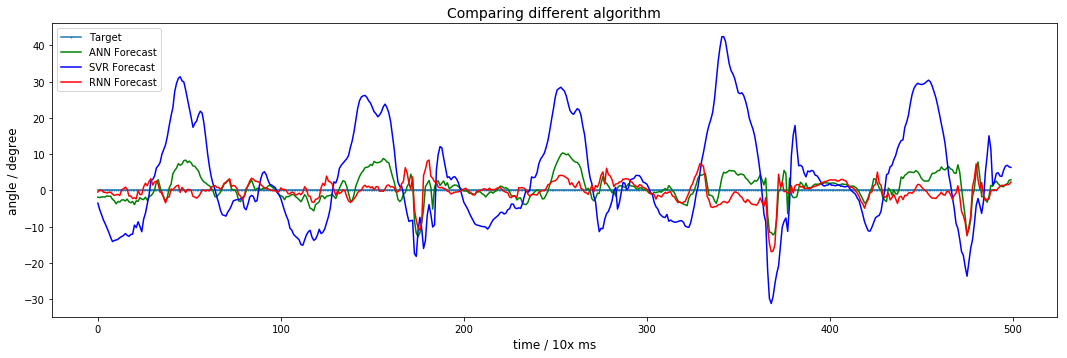

In [35]:
start = 17000
end = start+500
plt.figure(1,figsize = (18,1*5.4))
plt.title("Comparing different algorithm",fontsize = 14)

print("ANN mse:",np.mean(np.square(ANNoutput[start-recent:end-recent,0]*stdy+meany - (testy[start:end,0]*stdy+meany))))
print("SVR mse:",np.mean(np.square(SVR_y[start-recent:end-recent] - (testy[start:end,0]*stdy+meany))))
print("RNN mse:",np.mean(np.square(RNNoutput[start:end,0]*stdy+meany - (testy[start:end,0]*stdy+meany))))
plt.plot(pd.Series(testy[start+recent:end,0]*stdy+meany - (testy[start+recent:end,0]*stdy+meany)),'p-',markersize = 1, label = 'Target')
plt.plot(pd.Series(np.ravel(ANNoutput[start-recent:end-recent,0]*stdy+meany - (testy[start:end,0]*stdy+meany))),"g-",markersize = 1,label = 'ANN Forecast')

plt.plot(pd.Series(SVR_y[start-recent:end-recent] - (testy[start:end,0]*stdy+meany)),'b-',label = 'SVR Forecast')
plt.plot(pd.Series(RNNoutput[start:end,0]*stdy+meany - (testy[start:end,0]*stdy+meany)),'r-',label = 'RNN Forecast')
plt.legend(loc = "upper left")
plt.xlabel('time / 10x ms',fontsize = 'large')
plt.ylabel('angle / degree',fontsize = 'large')

plt.show()

In [221]:
    alpha = 0.00001
    start = 0
    end = 50000
    hiddenW1 = hidden1_params[0]
    hiddenb1 = hidden1_params[1]
    hiddenW2 = hidden2_params[0]
    hiddenb2 = hidden2_params[1]
    hiddenW3 = hidden3_params[0]
    hiddenb3 = hidden3_params[1]
    hiddenW4 = hidden4_params[0]
    hiddenb4 = hidden4_params[1]
    hiddenW5 = hidden5_params[0]
    hiddenb5 = hidden5_params[1]
    outputW1 = output_params[0].copy()
    outputb1 = output_params[1].copy()
    
    #mcu_x = mcu_test4[100:-5,0:7]
    
    #mcu_y = mcu_test4[100+5+recent:,0] - mcu_test4[100+5+recent:,2] 
    
    #testy = ((mcu_y - 35)/15).reshape([-1,1])
    #X = mcu_x.copy()
    #X[:,0] = (X[:,0] - mean1)/std1
    #X[:,1] = (X[:,1] - meanw1)/stdw1
    #X[:,2] = (X[:,2] - mean2)/std2
    #X[:,3] = (X[:,3] - meanw2)/stdw2
    #X[:,4] = (X[:,4] - 0)/3
    #X[:,5] = (X[:,5] - 0)/3
    #X[:,6] = (X[:,6] - 0)/3
    #testy = data_dict[string+'y'+str(num)][recent:,:].reshape([-1,1])
    #X = data_dict[string+'x' + str(num)].copy()
    
    testy = data_dict['final_testy2'][recent:,:].reshape([-1,1])
    X = data_dict['final_testx2'].copy()
    X[:,4:] = 0
    testx = np.zeros([X.shape[0] - recent,recent * 7])
    for i in range(recent):
        if(i == 0):
            testx[:,7*i:7*i+7] = X[recent:,0:7];
        else:
            testx[:,7*i:7*i+7] = X[recent-i:-i,0:7];
    
    ANNoutput = np.zeros(testy.shape)
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,24))
    ptr = 0;
    ####                                 #####
    #finaloutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros(ANNoutput.shape)
    for i in range(testy.shape[0]):
        hidden1 = testx[i,:].dot(hiddenW1) + hiddenb1
        hidden1[hidden1<0] = 0
        
        hidden2 = hidden1.dot(hiddenW2) + hiddenb2
        hidden2[hidden2<0] = 0
        
        hidden3 = hidden2.dot(hiddenW3) + hiddenb3
        hidden3[hidden3<0] = 0
        
        hidden4 = hidden3.dot(hiddenW4) + hiddenb4
        hidden4[hidden4<0] = 0
        
        hidden5 = hidden4.dot(hiddenW5) + hiddenb5
        hidden5[hidden5<0] = 0
        output = (hidden5.dot(outputW1) + outputb1).reshape([-1,1])
        ANNoutput[i,:] = output
        if(i==0):
            pass
        elif(i<5):
            pass
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = ANNoutput[i-5,:]
            diff = x_k5 - y_k
            outputW1 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([24,1])
            outputb1 += alpha * diff
           
        Queue_hidden2[ptr,:] = output[0]
        ptr = (ptr+1)%5
        
    ANNmse = np.mean(np.square(ANNoutput[start:end,:] - testy[start:end,:])*stdy**2)
    ANNmse2 = np.mean(np.square(ANNoutput[start:end,:] - testy[start:end,:]))
    ANNqua = np.mean(np.square(np.square(ANNoutput[start:end,:] - testy[start:end,:])))

In [222]:
ANNmse

21.906213318112894

In [211]:
    """
    SVR
    """
    
    SVR_y = clf1.predict(testx[:,:]) * stdy + meany
    SVRmse = np.mean(np.square(SVR_y[start+5:end] - testy[start+5:end]))

In [212]:
SVRmse = np.mean(np.square(SVR_y[start:end] - testy[start:end]-testy))

In [213]:
SVRmse

1509.076796435577

In [214]:
    """
    RNN
    """
    beta = 1
    Q_angle = 0.004
    Q_omega = 0.04
    R = 1
    alpha = 0.0001
    testx = X.copy()
    testy = data_dict['final_testy2']
    
    
    rnn_params = params_list[0]
    emg_params = params_list[1]
    dense1_params = params_list[2]
    hidden_dense_params = params_list[3]
    dense2_params = params_list[4]
    rnnW1 = rnn_params[0]
    rnnb1 = rnn_params[1].reshape(1,-1)
    rnnW2 = rnn_params[2]
    rnnb2 = rnn_params[3].reshape(1,-1)
    rnnW3 = rnn_params[4]
    rnnb3 = rnn_params[5].reshape(1,-1)
    
    emgW1 = emg_params[0]
    emgb1 = emg_params[1].reshape(1,-1)
    emgW2 = emg_params[2]
    emgb2 = emg_params[3].reshape(1,-1)
    
    denseW1 = dense1_params[0]
    denseb1 = dense1_params[1].reshape(1,-1)
    denseW2 = hidden_dense_params[0]
    denseb2 = hidden_dense_params[1].reshape(1,-1)
    denseW3 = dense2_params[0].copy()
    denseb3 = dense2_params[1].reshape(1,-1).copy()
    
    mean1 = -80 
    std1 = 15 
    meanw1 = 0
    stdw1 = 75

    mean2 = -110
    std2 = 15
    meanw2 = 0
    stdw2 = 90

    meany = 35
    stdy = 15

    input_angle_size = rnn_params[0].shape[0] - rnn_params[0].shape[1]
    input_emg_size = emg_params[0].shape[0] - emg_params[0].shape[1]

    hiddensize = rnnW1.shape[1]
    rnnsize2 = rnnW2.shape[1]
    rnnsize3 = rnnW3.shape[1]
    
    rnn_emg_size = emgW1.shape[1]
    
    hiddenlayersize = len(denseb1)
    rnn_state_size = len(rnnb1)
    outputsize = len(denseb3)
    Test_angle_input = np.zeros((1,input_angle_size+hiddensize))
    Test_emg_input = np.zeros((1,input_emg_size+rnn_emg_size))
    State1 = np.zeros((1,hiddensize))
    State2 = np.zeros((1,rnnsize2))
    State3 = np.zeros((1,rnnsize3))
    emgState1 = np.zeros((1,rnn_emg_size))
    emgState2 = np.zeros((1,rnn_emg_size))
    temp_input = np.zeros((1,hiddensize + rnnsize2));
    temp_input2 = np.zeros((1,2*rnn_emg_size));
    concate_input = np.zeros((1,rnnsize3 + rnn_emg_size))
    ####         FeedBack                ######
    
    Queue_hidden2 = np.zeros((5,16))
    ptr = 0;
    
    ####                                 #####
    RNNoutput = np.zeros((testx.shape[0],outputsize))
    unnormal = np.zeros((testx.shape[0],outputsize))
    for i in range(testx.shape[0]):
        Test_angle_input[0,:input_angle_size] = testx[i,0:4].T
        Test_angle_input[0,input_angle_size:] = State1
        State1 = Test_angle_input.dot(rnnW1) + rnnb1
        State1[State1<0] = 0

        temp_input[0,0:hiddensize] = State1
        temp_input[0,hiddensize:] = State2
        State2 = temp_input.dot(rnnW2) + rnnb2
        State2[State2<0] = 0

        temp_input[0,0:rnnsize2] = State2
        temp_input[0,rnnsize2:] = State3
        State3 = temp_input.dot(rnnW3) + rnnb3
        State3[State3<0] = 0
        
        Test_emg_input[0,0:input_emg_size] = testx[i,4:7].T
        Test_emg_input[0,input_emg_size:] = emgState1
        emgState1 = Test_emg_input.dot(emgW1) + emgb1
        emgState1[emgState1<0] = 0
        
        temp_input2[0,0:rnn_emg_size] = emgState1
        temp_input2[0,rnn_emg_size:] = emgState2
        emgState2 = temp_input2.dot(emgW2) + emgb2
        emgState2[emgState2<0] = 0
        
        concate_input[0,0:hiddensize] = State3
        concate_input[0,hiddensize:] = emgState2
        
        hidden = concate_input.dot(denseW1)+denseb1 
        hidden[hidden<0] = 0

        hidden2 = hidden.dot(denseW2) + denseb2
        hidden2[hidden2<0] = 0

        tempoutput = hidden2.dot(denseW3) + denseb3
        
        if(i==0):
            temp_uno = tempoutput*15 + 35
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
        elif(i<5):
            
            temp_uno = (tempoutput*15 + 35)*beta + (1-beta)*temp_uno
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R,Kalman_params)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
          ### Feedback here  #### 
        else:
            x_k5 = (testx[i,0]*std1+mean1-(testx[i,2]*std2 + mean2) - meany)/stdy
            y_k = RNNoutput[i-5,:]
            diff = x_k5 - y_k
            denseW3 += alpha * (diff) * Queue_hidden2[ptr,:].reshape([16,1])
            denseb3 += alpha * diff
            
            temp_uno = (tempoutput*15 + 35)*beta + (1-beta)*temp_uno
            Kalman_params = srtp.KalmanFilter(temp_uno,Q_angle,Q_omega,R,Kalman_params)
            RNNoutput[i,:] = (Kalman_params[0]-35)/15
            
            
        Queue_hidden2[ptr,:] = hidden2[0]
        ptr = (ptr+1)%5
        
    RNNmse = np.mean(np.square(RNNoutput[start:end,:] - testy[start:end,:])*stdy**2)
    RNNmse2 = np.mean(np.square(RNNoutput[start:end,:] - testy[start:end,:]))
    RNNqua = np.mean(np.square(np.square(RNNoutput[start:end,:] - testy[start:end,:])))
    
    

In [215]:
RNNmse

8.357005395308018

6.009073493484509
857.5664801330189
13.43775754355387


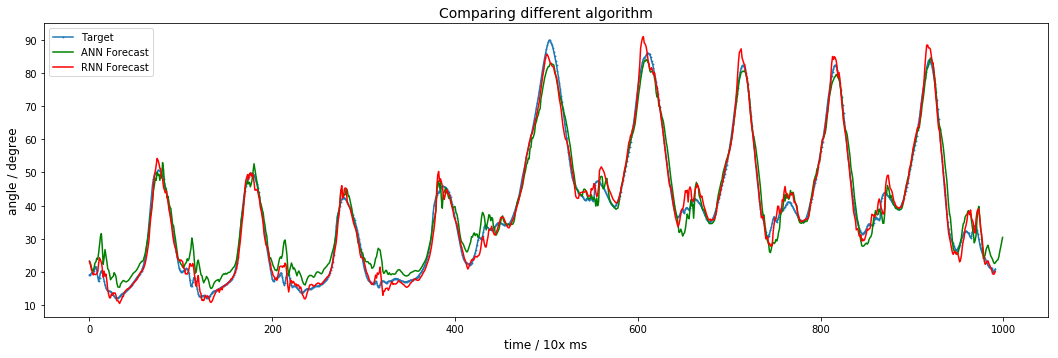

In [220]:
start = 15000
end = 16000

print(np.mean(np.square(RNNoutput[start:end,:] - testy[start:end,:])*stdy**2))

print(np.mean(np.square(SVR_y[start-recent:end-recent] - testy[start:end,:]*stdy - meany)))
print(np.mean(np.square(ANNoutput[start-recent:end-recent,:] - testy[start:end])*stdy**2))
plt.figure(1,figsize = (18,1*5.4))
plt.title("Comparing different algorithm",fontsize = 14)
        
plt.plot(pd.Series(testy[start+recent:end,0]*stdy+meany),'p-',markersize = 1, label = 'Target')
plt.plot(pd.Series(np.ravel(ANNoutput[start:end,0]*stdy+meany)),"g-",markersize = 1,label = 'ANN Forecast')

#plt.plot(pd.Series(SVR_y[start:end]),'b-',label = 'SVR Forecast')
plt.plot(pd.Series(RNNoutput[start+recent:end,0]*stdy+meany),'r-',label = 'RNN Forecast')
plt.legend(loc = "upper left")
plt.xlabel('time / 10x ms',fontsize = 'large')
plt.ylabel('angle / degree',fontsize = 'large')

plt.show()